<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;"><img src="https://pbs.twimg.com/profile_images/1187259618/unidata_logo_rgb_sm_400x400.png" alt="Unidata Logo" style="height: 98px;"></div>

<h1>Making an Interactive GOES Plot</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import display
from ipywidgets import Dropdown, interact, fixed, Select
from matplotlib import patheffects
import matplotlib.pyplot as plt
import metpy
from metpy.plots import add_timestamp
import numpy as np
from siphon.catalog import TDSCatalog

In [2]:
def open_dataset(date, channel, idx, region):
    """
    Open and return a netCDF Dataset object for a given date, channel, and image index
    of GOES-16 data from THREDDS test server.
    """
    cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
                     f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/{date:%Y%m%d}/catalog.xml')
    ds = cat.datasets[idx]
    ds = ds.remote_access(use_xarray=True)   
    return ds

In [3]:
def plot_GOES16_channel(date, idx, channel, region):
    """
    Get and plot a GOES 16 data band from the ABI.
    """
    ds = open_dataset(date, channel, idx, region)
    dat = ds.metpy.parse_cf('Sectorized_CMI')
    proj = dat.metpy.cartopy_crs
    x = dat['x']
    y = dat['y']

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    ax.add_feature(cfeature.COASTLINE, linewidth=2)
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')

    for im in ax.images:
        im.remove()
    im = ax.imshow(dat, extent=(x.min(), x.max(), y.min(), y.max()), origin='upper')
    timestamp = datetime.strptime(ds.start_date_time, '%Y%j%H%M%S')
    
    add_timestamp(ax, time=timestamp, high_contrast=True, 
                  pretext=f'GOES 16 Ch.{channel} - ',
                  time_format='%d %B %Y %H%MZ', y=0.01,
                  fontsize=18)
    display(fig)
    plt.close()

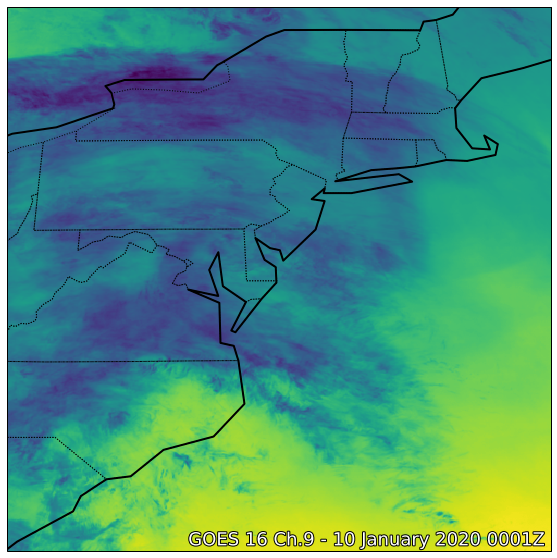

<function __main__.plot_GOES16_channel(date, idx, channel, region)>

In [4]:
channel_list = {u'1 - Blue Band 0.47 \u03BCm': 1,
                u'2 - Red Band 0.64 \u03BCm': 2,
                u'3 - Veggie Band 0.86 \u03BCm': 3,
                u'4 - Cirrus Band 1.37 \u03BCm': 4,
                u'5 - Snow/Ice Band 1.6 \u03BCm': 5,
                u'6 - Cloud Particle Size Band 2.2 \u03BCm': 6,
                u'7 - Shortwave Window Band 3.9 \u03BCm': 7,
                u'8 - Upper-Level Tropo. WV Band 6.2 \u03BCm': 8,
                u'9 - Mid-Level Tropo. WV Band 6.9 \u03BCm': 9,
                u'10 - Low-Level WV Band 7.3 \u03BCm': 10,
                u'11 - Cloud-Top Phase Band 8.4 \u03BCm': 11,
                u'12 - Ozone Band 9.6 \u03BCm': 12,
                u'13 - Clean IR Longwave Band 10.3 \u03BCm': 13,
                u'14 - IR Longwave Band 11.2 \u03BCm': 14,
                u'15 - Dirty Longwave Band 12.3 \u03BCm': 15,
                u'16 - CO2 Longwave IR 13.3 \u03BCm': 16}

region = Select(
    options=['Mesoscale-1', 'Mesoscale-2', 'CONUS', 'PuertoRico', 'FullDisk'],
    description='Region:',
)

channel = Dropdown(
    options=channel_list,
    value=9,
    description='Channel:',
)

date = datetime.utcnow()
interact(plot_GOES16_channel, date=fixed(date), idx=fixed(-2), 
         channel=channel, region=region)